In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Cleaning

In [3]:
df.shape

(284807, 31)

In [4]:
df['Class'].value_counts(normalize=True)
# imbalanced highly

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [5]:
#drop duplicates
df = df.drop_duplicates()

In [6]:
# check missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# outlier handled
q1,q99 = df['Amount'].quantile([0.01,0.99])
df['Amount']= df['Amount'].clip(q1,q99)

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.shape

(283726, 31)

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (roc_auc_score, average_precision_score, confusion_matrix, classification_report,
RocCurveDisplay, PrecisionRecallDisplay, f1_score)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from joblib import dump

In [10]:
X = df.drop(columns=['Class'])
y = df['Class']
print("X shape:", X.shape)
print("y mean (fraud ratio):", y.mean())

X shape: (283726, 30)
y mean (fraud ratio): 0.001667101358352777


In [ ]:
# split data into train/validation/test
X_train_full,X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42)


print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (181584, 30) Val: (45396, 30) Test: (56746, 30)


In [14]:
# Logistic Regression
logreg = LogisticRegression(penalty='l2', max_iter=2000, solver='lbfgs', class_weight='balanced', random_state=42)
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42, class_weight='balanced_subsample')

logreg_pipe = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', logreg)
])

rf_pipe = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', rf)
])

models = {"LogReg": logreg_pipe, "RandomForest": rf_pipe}

In [15]:
best_model, best_name, best_score = None, None, -np.inf

for name, model in models.items():
    model.fit(X_train,y_train)
    val_proba = model.predict_proba(X_val)[:,1]
    pr_auc = average_precision_score(y_val, val_proba)
    roc = roc_auc_score(y_val, val_proba)
    print(f"{name}: VAL PR-AUC={pr_auc:.4f} | ROC-AUC={roc:.4f}")
    if pr_auc > best_score:
        best_model, best_name, best_score = model, name, pr_auc

print("\nBest model:", best_name)

LogReg: VAL PR-AUC=0.8115 | ROC-AUC=0.9765
RandomForest: VAL PR-AUC=0.8702 | ROC-AUC=0.9592

Best model: RandomForest


In [16]:
# threshold tuning
val_proba = best_model.predict_proba(X_val)[:,1]
thresholds = np.linspace(0.01,0.99,99)

scores = []
for t in thresholds:
    preds = (val_proba >= t).astype(int)
    scores.append(f1_score(y_val,preds))
    
best_thresh = thresholds[np.argmax(scores)]

In [17]:
def evaluate(model,X,y, threshold=0.5, set_name='TEST'):
    proba = model.predict_proba(X)[:,1]
    roc = roc_auc_score(y,proba)
    pr = average_precision_score(y,proba)
    preds = (proba >= threshold).astype(int)
    
    cm = confusion_matrix(y, preds)
    print(f"\n=== {set_name} ===")
    print(f"ROC-AUC: {roc:.4f} | PR-AUC: {pr:.4f} | Threshold: {threshold:.2f}")
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y, preds, digits=4))
    
    RocCurveDisplay.from_predictions(y, proba)
    plt.title(f"{set_name} ROC")
    plt.show()

    PrecisionRecallDisplay.from_predictions(y, proba)
    plt.title(f"{set_name} PR Curve")
    plt.show()


=== VAL ===
ROC-AUC: 0.9592 | PR-AUC: 0.8702 | Threshold: 0.43
Confusion Matrix:
 [[45315     5]
 [   11    65]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9999    0.9998     45320
           1     0.9286    0.8553    0.8904        76

    accuracy                         0.9996     45396
   macro avg     0.9642    0.9276    0.9451     45396
weighted avg     0.9996    0.9996    0.9996     45396



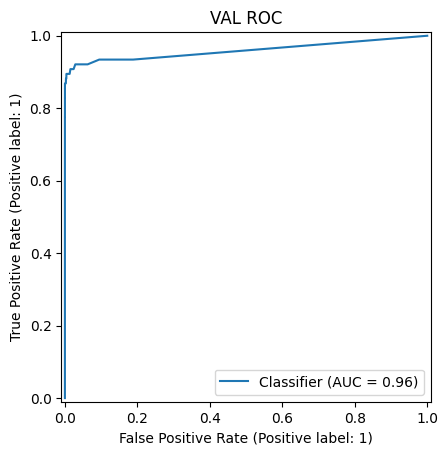

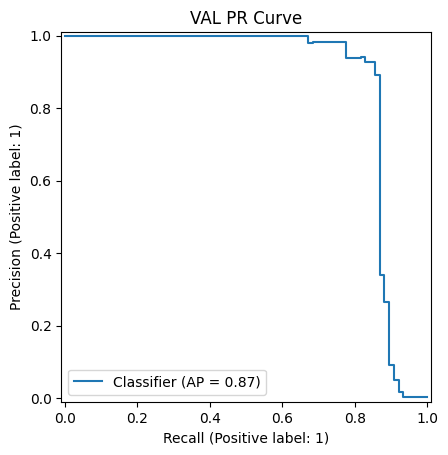

In [18]:
evaluate(best_model, X_val, y_val, threshold=best_thresh, set_name="VAL")


=== TEST ===
ROC-AUC: 0.9607 | PR-AUC: 0.8123 | Threshold: 0.43
Confusion Matrix:
 [[56642     9]
 [   21    74]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56651
           1     0.8916    0.7789    0.8315        95

    accuracy                         0.9995     56746
   macro avg     0.9456    0.8894    0.9156     56746
weighted avg     0.9994    0.9995    0.9995     56746



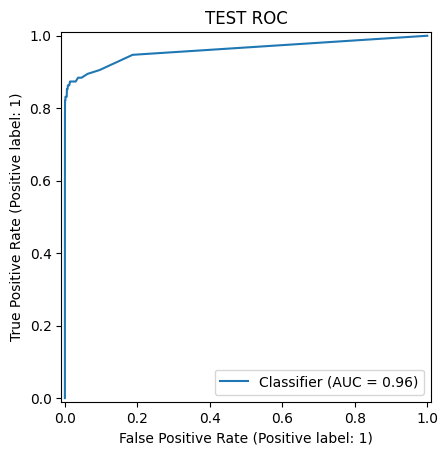

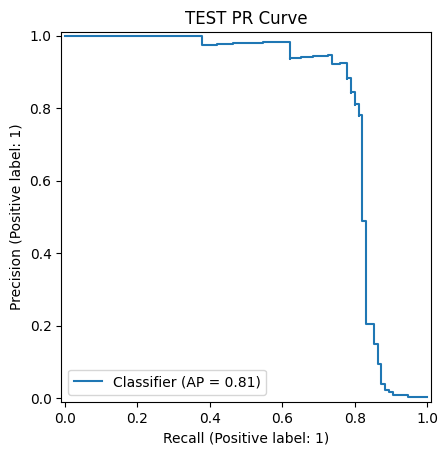

In [21]:

evaluate(best_model, X_test, y_test, threshold=best_thresh, set_name="TEST")


In [22]:
import pickle

with open("fraud_model.pkl", "wb") as f:
    pickle.dump(
        {
            "model": best_model,
            "threshold": best_thresh,
            "features": X.columns.tolist()
        },
        f
    )

In [5]:
fraud_samples = df[df['Class'] == 1].sample(5, random_state=42)
nonfraud_samples = df[df['Class'] == 0].sample(95, random_state=42)

test_df = pd.concat([fraud_samples, nonfraud_samples])
test_df.to_csv("real_test_data.csv", index=False)